In [7]:
from google.colab import files

uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
import plotly.express as px

df = pd.read_csv('netflix_titles.csv')
df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,24-Sep-21,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [61]:
df.shape

(8807, 12)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [65]:
null_count_by_variable=df.isnull().sum()/len(df)*100
null_count_by_variable #Տոկոսը null արժեքների

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


- Տվյալներում տրամադրված է 8807 տող և 12 սյունակ։
- Director, cast, country, date_added, rating, duration սյուներում առկա են զրոյական արժեքներ։
- Կրկնօրինակ արժեքներ գոյություն չունեն։
- Քանի որ duration և rating սյուներում առկա են միայն մի քանի զրոյական արժեքներ (համապատասխանաբար 3 և 4), մենք դրանք կհեռացնենք տվյալներից։




> Cleaning



In [66]:
df['director'] = df['director'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df.isnull().sum()
#լավագույն տարբերակը NaN-ը փոխարինելն է անհայտով

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [67]:
df = df.dropna(subset=['rating', 'duration'])

In [68]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
#գտնում է դատասետում ամենահաճախակի ամսաթիվը և փոխարինում NaN-ը

In [18]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [19]:
df.shape

(8800, 12)

In [20]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0




> Type - Movies and Tvshows



In [22]:
type_counts = df['type'].value_counts() #type-ում հաշվում է քանի հատ կա Movies և Tvshows
print(type_counts)

type
Movie      6126
TV Show    2674
Name: count, dtype: int64


In [23]:
pie = px.pie(type_counts, values=type_counts.values, names=type_counts.index, title='Movies vs TVShows')
pie.show()

- Տեսնում ենք, որ Netflix-ում հասանելի 69.6%-ը ֆիլմեր են՝ 6126, մնացած 30.4%-ը՝ հեռուստաշոուներ 2674։

Ratings

In [24]:
ratings_counts = df['rating'].value_counts()
print(ratings_counts)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


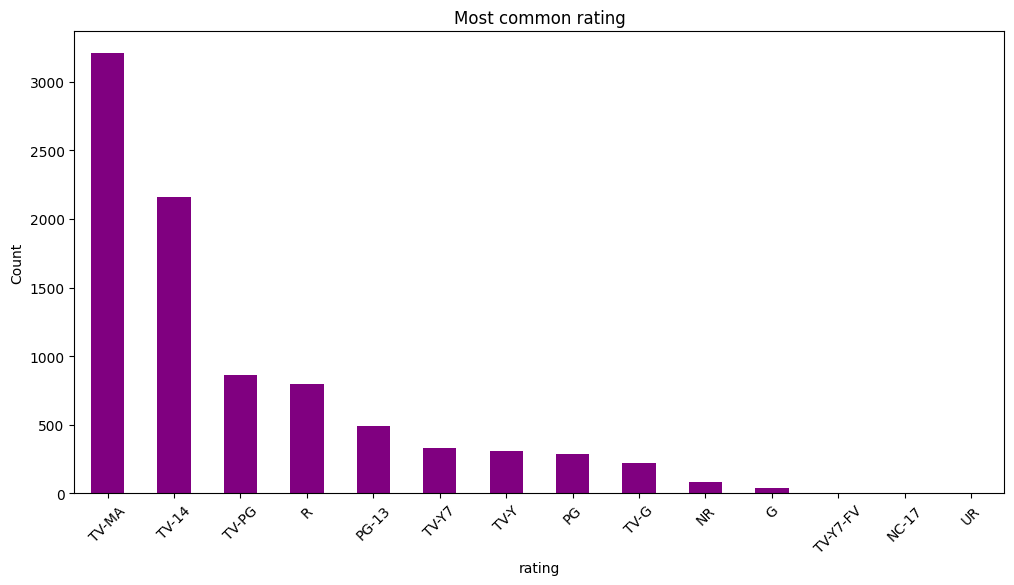

In [25]:
plt.figure(figsize=(12, 6))
ratings_counts.plot(kind='bar', color = 'purple')
plt.title("Most common rating")
plt.xlabel("rating")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


- TV-MA-ն գլխավորում է չարթերը rating-ում, ինչը ցույց է տալիս, որ Netflix-ում ավելի շատ դիտում են մեծահասակների համար նախատեսված ֆիլմեր/շոուներ:
- NC-17 rating-ը շատ քիչ ֆիլմեր ունի, քանի որ այս տեսակի կոնտենտը նախատեսված է բացառապես 17 տարեկանից բարձր դիտողների համար:

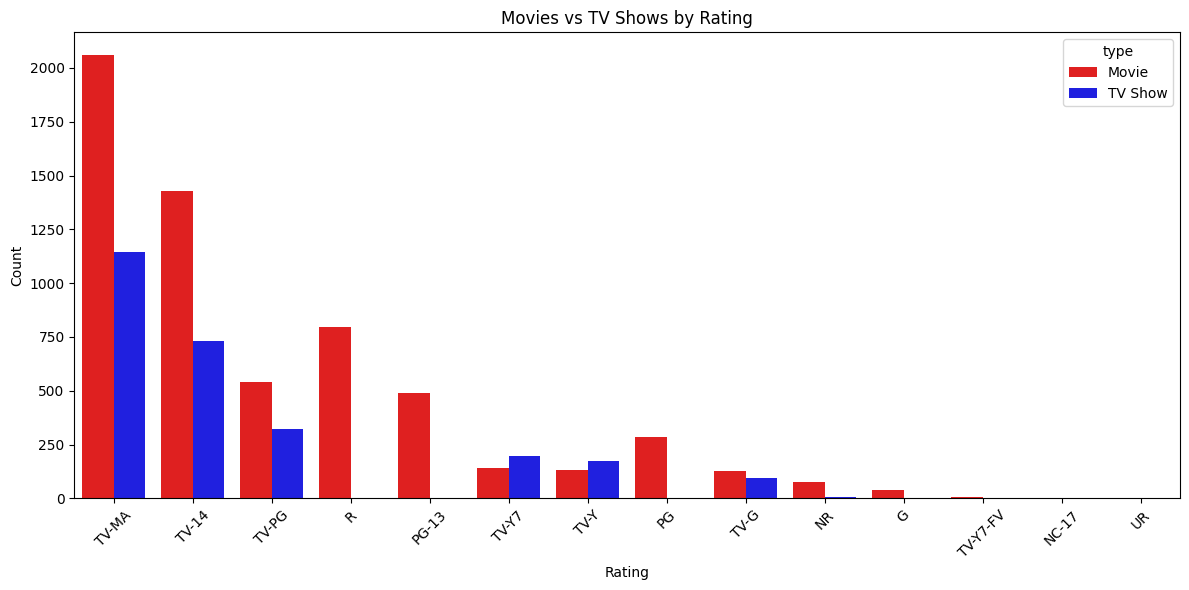

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', hue='type', data=df, palette=['red', 'blue'], order=df['rating'].value_counts().index)
plt.title('Movies vs TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Համեմատում է Movies ev TvShows ըստ rating-ի

- Քանի որ rating անունները այդքան հարմար չէ վերլուծել հետևաբար խմբավորենք հետևյալ կերպով:

In [ ]:
rating1 = {
    'TV-MA': 'Mature', 'R': 'Mature', 'NC-17': 'Mature',
    'TV-14': 'Teens', 'PG-13': 'Teens', 'TV-PG': 'Teens',
    'PG': 'Family', 'TV-G': 'Family', 'G': 'Family',
    'TV-Y7': 'Kids', 'TV-Y7-FV': 'Kids', 'TV-Y': 'Kids',
} #ստեղ ավելի պարզ կատեգորիաների եմ բաշխում
category_order = ['Mature', 'Teens', 'Family', 'Kids']
df['audience_category'] = df['rating'].replace(rating1)
df['audience_category'] = df['rating'].replace(rating1)
movie_strategic_counts = df['audience_category'].value_counts(dropna=False)
movie_strategic_counts

,count
audience_category,
Mature,4009
Teens,3513
Kids,647
Family,548
NR,80
UR,3


In [ ]:
pie = px.pie(movie_strategic_counts, values=movie_strategic_counts.values, names=movie_strategic_counts.index, title='Rating Distripution on Netflix')
pie.show()

- Այսինքն ստացանք, որ rating-ը հիմնականում ավելի շատ կենտրոնացած է մեծահասակների կատեգորիայի վրա (45.6%), քան մանկական հաղորդումների վրա, ինչը տրամաբանական է, քանի որ հեռուստաշոուներն ավելի շատ են թողարկում մանկական կատեգորիա, և մենք արդեն տեսել ենք, որ ֆիլմը գերազանցում է հեռուստաշոուների թվին։

Դիտարկենք, թե որքան ֆիլմեր/շոուներ են արտադրում տարբեր երկրները

In [27]:
df_country = df[df['country'] != 'Unknown']
df_country['country_list'] = df_country['country'].str.split(', ') #բաժանում է string-ը ցանկ է դարձնում, նոր սյան անունը` country_list
df_exploded = df_country.explode('country_list')
df_exploded.head(10)

/tmp/ipython-input-3115080360.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Ghana
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Burkina Faso
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United Kingdom
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Germany
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Ethiopia
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom


In [28]:
country_counts = df_exploded.groupby(['country_list', 'type']).size().unstack(fill_value=0)
country_counts = country_counts.sort_values(by='Movie', ascending=False) #տեսակը դասավորում է ըստ  movie` առաջինը կլինի այն երկիերը որը ամենաշատ movie ունի
top_countries = country_counts.head(10)
top_countries

type,Movie,TV Show
country_list,,
United States,2748,938
India,962,84
United Kingdom,532,272
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
China,114,48


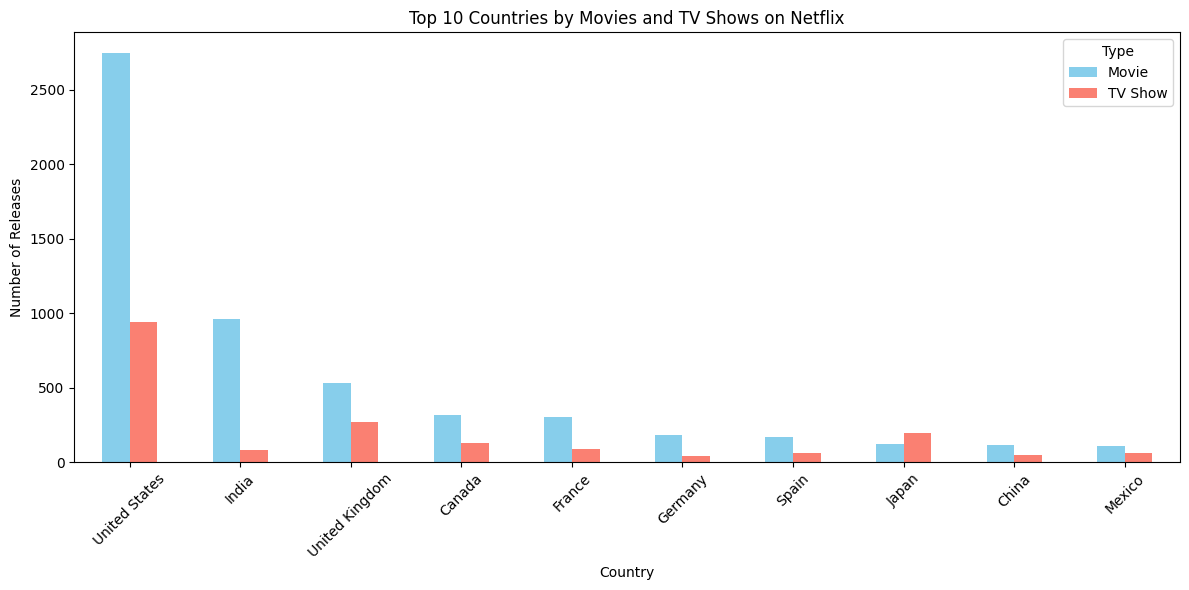

In [29]:
top_countries.plot(kind='bar', figsize=(12,6), color=['skyblue', 'salmon'])
plt.title('Top 10 Countries by Movies and TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


- Ինչպես տեսնում ենք ԱՄՆ-ն, Հնդկաստանը և Մեծ Բրիտանիան ստեղծում են հարթակում հեռուստաշոուների և ֆիլմերի կեսից ավելին։
- Հիմնականում երկրները ավելի շատ ստեղծում է ֆիլմեր քան շոուներ, բացի Ճապոնիայից:
- ԱՄՆ-ն երկու տեսակի բովանդակության առաջատար արտադրողն է,որը տրամաբանական է, քանի որ Netflix-ը ամերիկյան ընկերություն է։

In [30]:
yearly_counts = (df_exploded.groupby(['release_year', 'country', 'type']).size().reset_index(name='count'))
yearly_counts = yearly_counts.sort_values(by='count', ascending=False)
top = yearly_counts.head(10)
top

,release_year,country,type,count
1411,2017,United States,Movie,283
1610,2018,United States,Movie,246
1782,2019,United States,Movie,217
1212,2016,United States,Movie,210
1930,2020,United States,Movie,177
1931,2020,United States,TV Show,159
1783,2019,United States,TV Show,134
1017,2015,United States,Movie,112
1611,2018,United States,TV Show,110
1314,2017,India,Movie,98


Տարիների ընթացքում ֆիլմերի/շոուների աճ

In [31]:
yearly_trend = (df.groupby(['release_year', 'type']).size().reset_index(name='count'))

fig = px.line(yearly_trend, x='release_year', y='count', color='type', title='Movies vs TV Shows Released by Year')

fig.show()

- Netflix-ում ֆիլմերի թվի աճը շատ ավելի բարձր է, քան հեռուստասերիալների։
- Ֆիլմերի և հեռուստասերիալների ամենամեծ թիվը ավելացվել է 2017, 2018 և 2020 թվականներին։

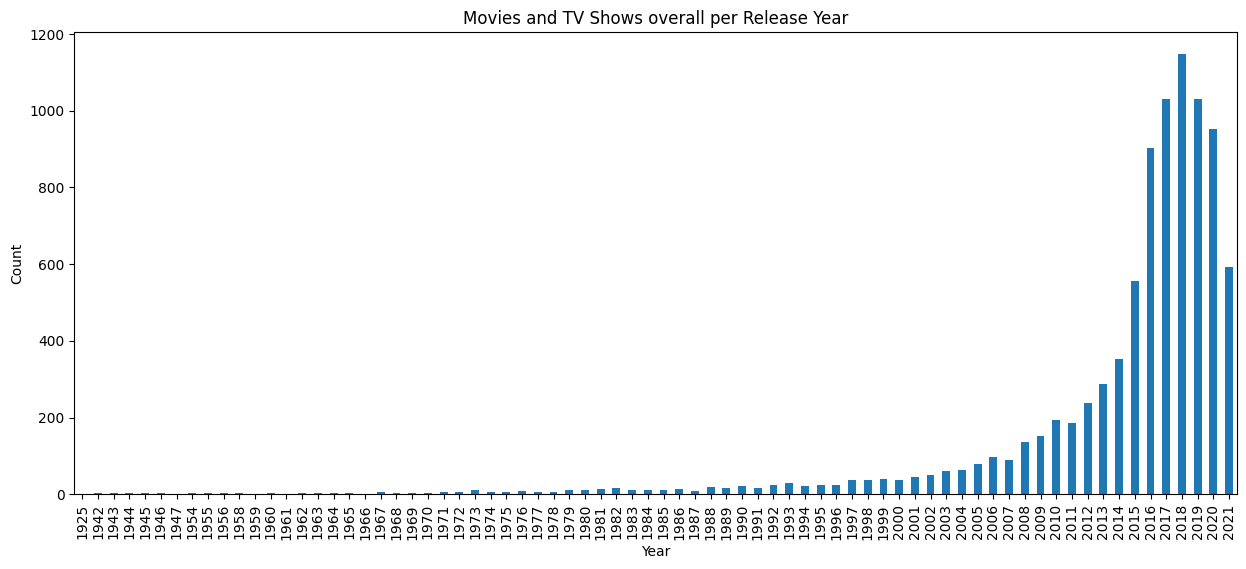

In [32]:
plt.figure(figsize=(15, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Movies and TV Shows overall per Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


Պարզենք, թե որ ժանրն է ավելի տարածված

In [33]:
genres = df['listed_in'].str.split(', ')
genres_exploded = genres.explode()
genre_counts = genres_exploded.value_counts()
genre_counts

,count
listed_in,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1350
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


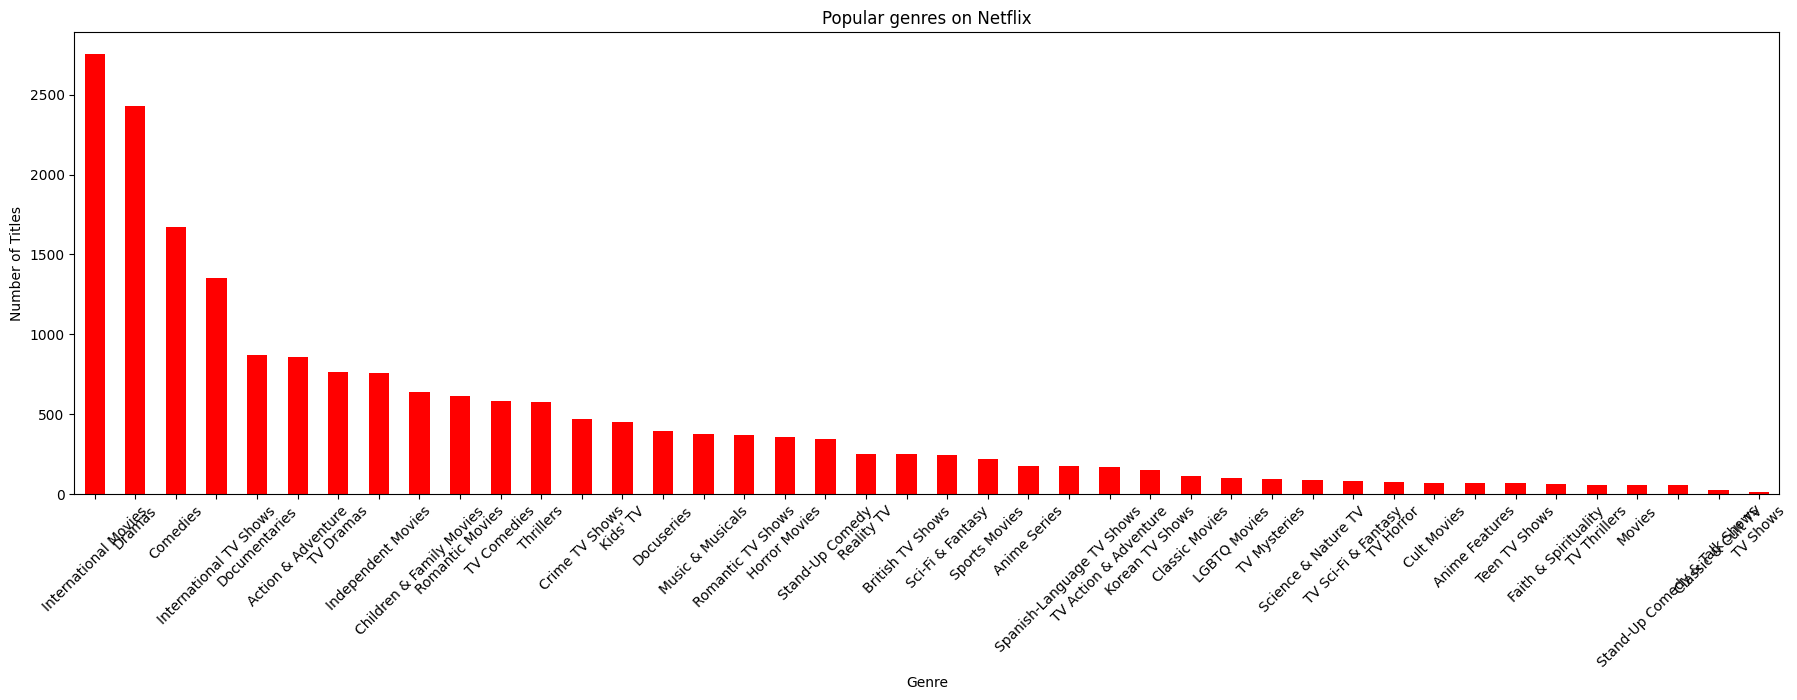

In [ ]:
plt.figure(figsize=(22,6))
genre_counts.plot(kind='bar', color='red')
plt.title("Popular genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


- International Movies(2752), Dramas (2427) ֆիլմերը և Comedies (1674) մեծ մասամբ տարածված ընտրություններ են:


Պարզենք, թե նշված ժանրները որ երկրներում են տարածված:

In [ ]:
genres = ['Dramas', 'Comedies', 'International Movies']
df_genres = df.copy()
# բաժանում ենք ժանրները
df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')
# բաժանում ենք երկրները
df_genres['country'] = df_genres['country'].str.split(', ')
df_genres = df_genres.explode('listed_in')
df_genres = df_genres.explode('country')
df_filtered = df_genres[df_genres['listed_in'].isin(genres)]
genre_country_counts = (df_filtered.groupby(['listed_in', 'country']).size().reset_index(name='count').sort_values('count', ascending=False))

genre_country_counts.head(10)


,listed_in,country,count
199,International Movies,India,864
158,Dramas,United States,835
61,Comedies,United States,680
99,Dramas,India,662
22,Comedies,India,323
190,International Movies,France,207
156,Dramas,United Kingdom,196
257,International Movies,United Kingdom,168
90,Dramas,France,167
259,International Movies,United States,166


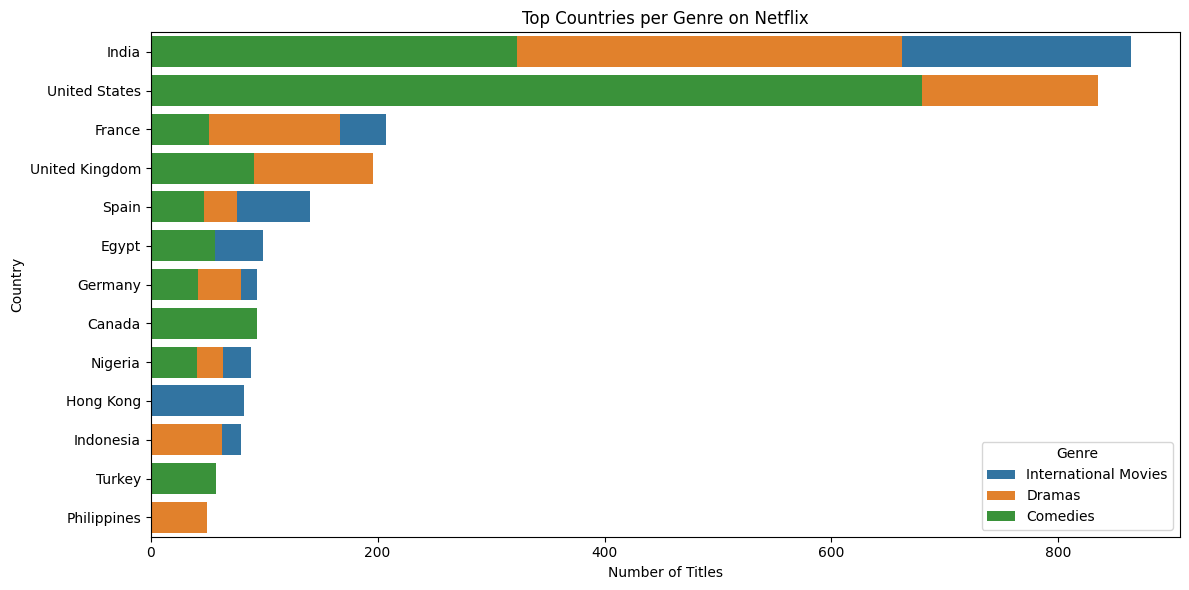

In [ ]:
top10 = genre_country_counts.groupby('listed_in').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='count', y='country', hue='listed_in', dodge=False)
plt.title('Top Countries per Genre on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


- Մինչ ԱՄՆ-ն ընդհանուր առմամբ արտադրում է ամենաշատ ֆիլմերը, Հնդկաստանը առաջատարն է կոնկրետ այս 3 ժանրերի արտադրության մեջ, ինչը ցույց է տալիս, որ այդ երկրում կինոընկերություններն ու հանդիսատեսը առանձնահատուկ ուշադրություն են դարձնում այդ ժանրերին:

In [69]:
df['listed_in'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('listed_in')
genre_type_counts = (df_exploded.groupby(['listed_in', 'type']).size().unstack(fill_value=0))

genre_type_counts

type,Movie,TV Show
listed_in,,
Action & Adventure,859,0
Anime Features,71,0
Anime Series,0,175
British TV Shows,0,253
Children & Family Movies,641,0
Classic & Cult TV,0,28
Classic Movies,116,0
Comedies,1674,0
Crime TV Shows,0,470


In [70]:
# Առավելագույն ժանր ֆիլմերի համար
max_movie_genre = genre_type_counts['Movie'].idxmax()
max_movie_count = genre_type_counts['Movie'].max()
# Հեռուստաշոուների առավելագույն ժանրը
max_tv_genre = genre_type_counts['TV Show'].idxmax()
max_tv_count = genre_type_counts['TV Show'].max()

print(f"Առավելագույն ժանր ֆիլմերի համար: {max_movie_genre} ({max_movie_count} releases)")
print(f"Հեռուստաշոուների առավելագույն ժանրը: {max_tv_genre} ({max_tv_count} releases)")

Առավելագույն ժանր ֆիլմերի համար: International Movies (2752 releases)
Հեռուստաշոուների առավելագույն ժանրը: International TV Shows (1350 releases)


Ուսումնասիրենք ռեժիսորներին և առանձնացնենք հայտնիներին:

In [71]:
directorr= df[df['director'] != 'Unknown']
#Յուրաքանչյուր տողում բաժանեք մի քանի ռեժիսորների
all_directors = directorr['director'].str.split(',').explode().str.strip()
#Հաշվենք յուրաքանչյուր ռեժիսորներին
director_counts = all_directors.value_counts().reset_index()
director_counts.columns = ['director', 'count']
director_counts


,director,count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Suhas Kadav,16
...,...,...
4986,Robert Cullen,1
4987,Kirsten Johnson,1
4988,Mozez Singh,1
4989,Milla Harrison-Hansley,1


In [72]:
top_directors = director_counts.head(10)
top_directors

,director,count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Jay Chapman,12


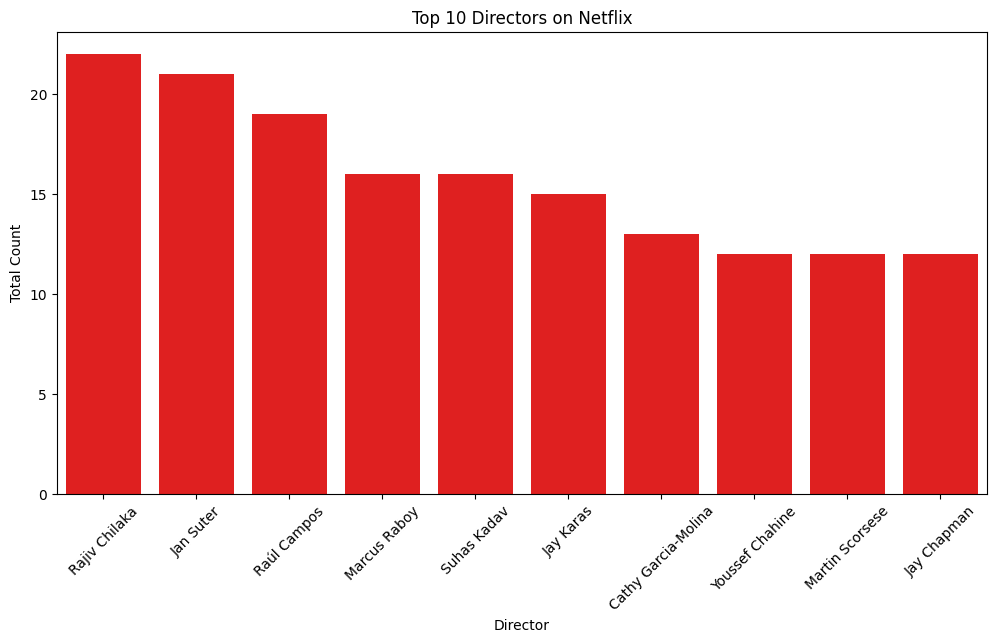

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_directors, x='director', y='count', color = 'red')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()


- Rajiv Chilaka, Jan Suter, Raúl Campos, Marcus Raboy, Suhas Kadav այն 5 ռեժիսորներն են, որոնք ամենաշատ ֆիլմեր և հեռուստաշոուներ են նկարահանել։

Նույն ձևով վերլուծենք դերասաններին

In [74]:
actors = df['cast'].str.split(', ')
actors_exploded = actors.explode()
actors_exploded = actors_exploded[actors_exploded != 'Unknown']
actors_counts = actors_exploded.value_counts().reset_index()
actors_counts.columns = ['actor', 'count']
actors_counts

,actor,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
...,...,...
36423,NeNe Leakes,1
36424,Ane Dahl Torp,1
36425,Bharani Shankar,1
36426,Mukhtar Khan,1


In [75]:
top_actors = actors_counts.head(5)
top_actors

,actor,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32


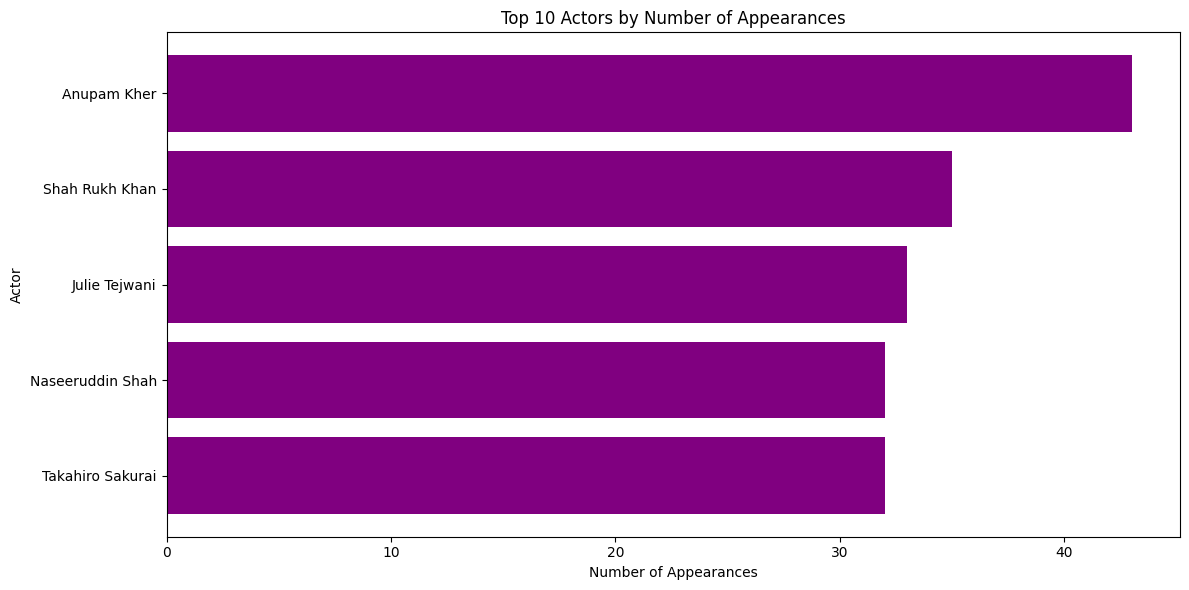

In [76]:
plt.figure(figsize=(12, 6))
plt.barh(top_actors['actor'][::-1], top_actors['count'][::-1], color='purple')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Appearances')
plt.tight_layout()
plt.show()


- Հետաքրքիր է դիտարկել, որ դերասաններն են շատը խաղացել ֆիլմերում և շոուներում առաձին:

In [77]:
actors = df.dropna(subset=['cast']).copy()
actors['cast_list'] = actors['cast'].str.split(', ')
actors_exploded = actors.explode('cast_list')
actors_exploded = actors_exploded[actors_exploded['cast_list'] != 'Unknown']
actors_counts_type = actors_exploded.groupby(['type', 'cast_list']).size().reset_index(name='count')
actors_counts_type

,type,cast_list,count
0,Movie,Jr.,1
1,Movie,"""Riley"" Lakdhar Dridi",1
2,Movie,'Najite Dede,1
3,Movie,2Mex,1
4,Movie,4Minute,1
...,...,...,...
40789,TV Show,İştar Gökseven,1
40790,TV Show,Şafak Başkaya,1
40791,TV Show,Şehsuvar Aktaş,1
40792,TV Show,Şenay Gürler,1


In [78]:
actors_counts_type = actors_counts_type.sort_values(['type', 'count'], ascending=[True, False])
top_actors_movies = actors_counts_type[actors_counts_type['type'] == 'Movie'].head(10)
top_actors_tv = actors_counts_type[actors_counts_type['type'] == 'TV Show'].head(10)

print(f"{top_actors_movies}")
print(f"{top_actors_tv}")

        type         cast_list  count
2102   Movie       Anupam Kher     42
21774  Movie    Shah Rukh Khan     35
17187  Movie  Naseeruddin Shah     32
638    Movie      Akshay Kumar     30
18058  Movie           Om Puri     30
1311   Movie  Amitabh Bachchan     28
12026  Movie     Julie Tejwani     28
18322  Movie      Paresh Rawal     28
3351   Movie       Boman Irani     27
20685  Movie      Rupa Bhimani     27
          type           cast_list  count
39161  TV Show    Takahiro Sakurai     25
40511  TV Show           Yuki Kaji     19
28817  TV Show         Daisuke Ono     17
32741  TV Show      Junichi Suwabe     17
26196  TV Show           Ai Kayano     16
40495  TV Show     Yuichi Nakamura     16
32698  TV Show        Jun Fukuyama     15
40427  TV Show    Yoshimasa Hosoya     15
29070  TV Show  David Attenborough     14
31033  TV Show      Hiroshi Kamiya     13


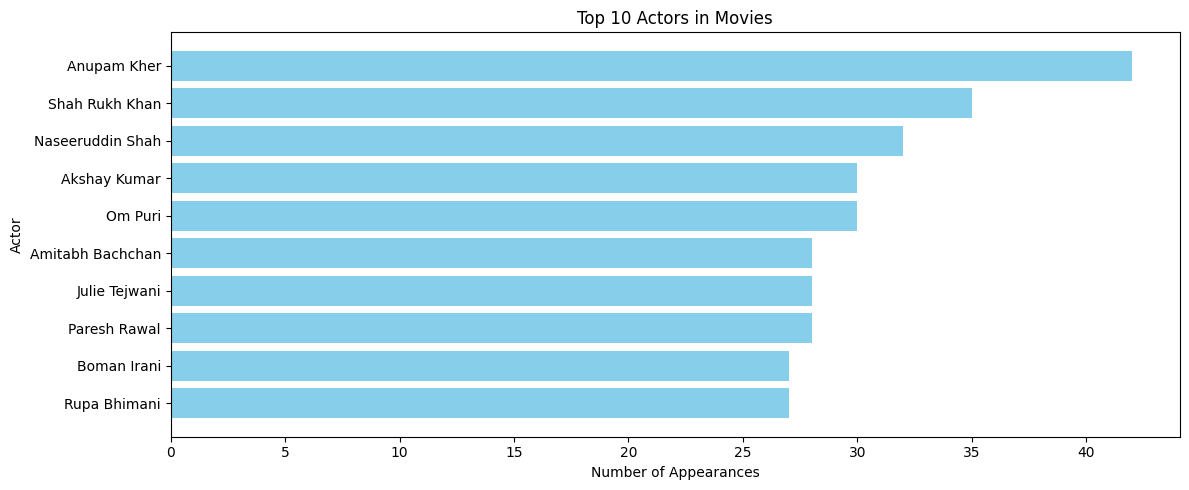

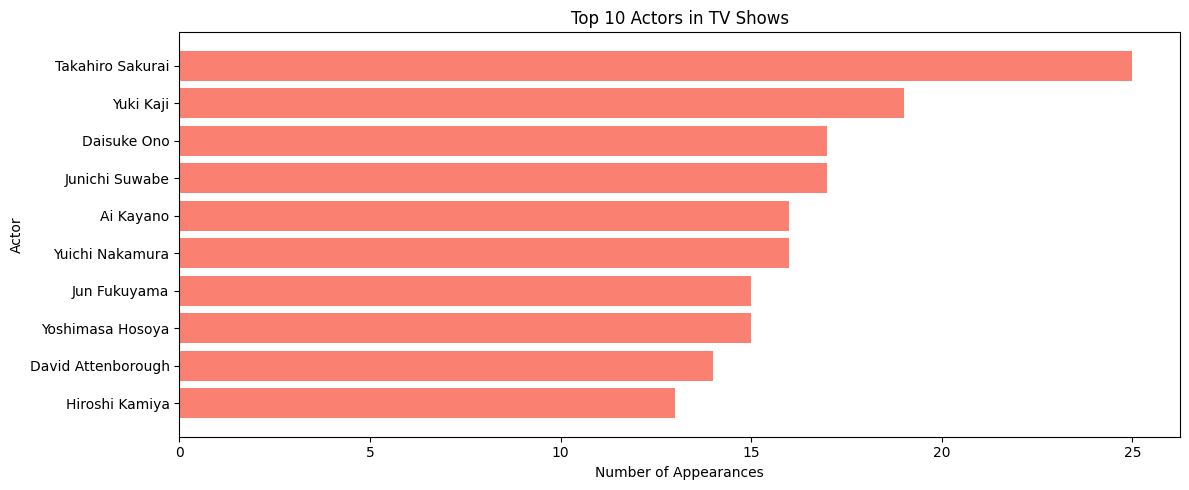

In [79]:
# Movies
plt.figure(figsize=(12,5))
plt.barh(top_actors_movies['cast_list'][::-1], top_actors_movies['count'][::-1], color='skyblue')
plt.title('Top 10 Actors in Movies')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

# TV Shows
plt.figure(figsize=(12,5))
plt.barh(top_actors_tv['cast_list'][::-1], top_actors_tv['count'][::-1], color='salmon')
plt.title('Top 10 Actors in TV Shows')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


- Ինչպես տեսնում ենք Anupam Kher-ը շատը խաղացել է ֆիլմերում և քանի որ արդեն տեսել ենք,որ ֆիլմերը գերազանցում էին շոուների թվին, հետևաբար նա հանդիսանում է ամենահայտնի դերասանը ընդհանուր
- Շոուների դեպքում հայտնի է՝ Takahiro Sakurai (ճապոնացի դերասան), որը տրամաբանական է, քանի որ արդեն տեսել ենք որ Ճապոնիայում գերազանցում են շոուները

Դիտարկենք date_added սյունը

Քանի որ date_added սյունը ունի հետևյալ տեսքը ՝  25-Sep-21, ապա առանձնացնում ենք 'year', 'month', 'day':

In [80]:
df['date_added'] = pd.to_datetime(
    df['date_added'],
    format='%d-%b-%y',
    errors='coerce'
)

df['year'] = df['date_added'].dt.year.astype('Int64')
df['month'] = df['date_added'].dt.month.astype('Int64')
df['day'] = df['date_added'].dt.day.astype('Int64')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021,9,25
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021,9,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021,9,24
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021,9,24
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021,9,24


In [86]:
yearly_type = (df.dropna(subset=['year']).groupby(['year', 'type']).size().unstack(fill_value=0))

yearly_type

type,Movie,TV Show
year,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,4
2014,19,4
2015,56,17
2016,251,164


- Ֆիլմերի թիվը միշտ ավելի բարձր է, քան հեռուստասերիալներինը։

Հարց է առաջանում՝ արդյո՞ք Netflix-ը ավելի է կենտրոնանում հեռուստատեսության վրա, քան ֆիլմերի վրա

In [87]:
yearly_prop = yearly_type.div(yearly_type.sum(axis=1), axis=0)
yearly_prop

type,Movie,TV Show
year,,
2008,0.500000,0.500000
2009,1.000000,0.000000
2010,1.000000,0.000000
2011,1.000000,0.000000
2012,1.000000,0.000000
2013,0.600000,0.400000
2014,0.826087,0.173913
2015,0.767123,0.232877
2016,0.604819,0.395181


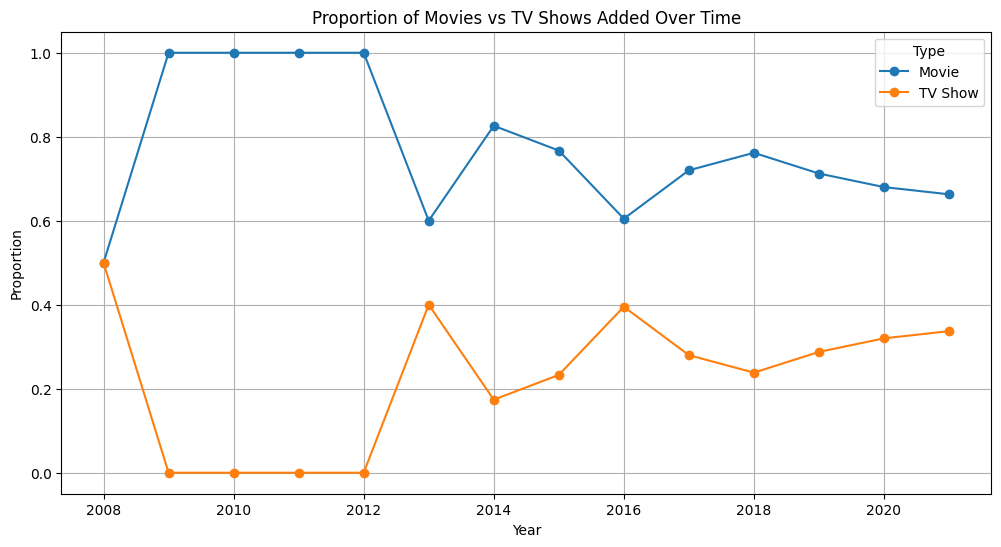

In [88]:
yearly_prop.plot(kind='line',figsize=(12, 6),marker='o')

plt.title('Proportion of Movies vs TV Shows Added Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Type')
plt.grid(True)
plt.show()


- Այս դիտարկումից կարող ենք ասել, որ Netflix-ը հնարավոր է, դանդաղորեն անցում է կատարում դեպի հեռուստաշոուներ։
- Քանի որ տեսնում ենք 2018-ից սկսած հեռուսաշոուները աճում է իսկ ֆիկմերը նվազում, նույնիսկ եթե ֆիլմերի քանակը դեռևս ավելի բարձր է։


Ո՞ր ամսին են ամենաշատ ֆիլմերն ու հեռուստաշոուները ավելացվում։

In [89]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_counts = (df.groupby(['month', 'type']).size().unstack(fill_value=0))
#Համոզվեք, որ բոլոր ամիսները (1–12) ներկայացված են և դասավորված են
monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)
#Ամսվա համարները փոխարինեք ամիսների անուններով
monthly_counts.index = month_names
monthly_counts

type,Movie,TV Show
Jan,545,191
Feb,382,174
Mar,528,205
Apr,549,209
May,439,187
Jun,492,232
Jul,565,254
Aug,518,230
Sep,518,246
Oct,545,210


Netflix-ում միջինում մեկ ամսում քանի Movie և քանի TV Show է թողարկվում։

In [90]:
average_monthly_release = df.groupby(['month', 'type']).size().unstack(fill_value=0).mean()
average_monthly_release

,0
type,
Movie,510.5
TV Show,215.5


Ամենաշատ ֆիլմեր/շոուների ավելացումներով ամիսը

In [91]:
most_movies_month = monthly_counts['Movie'].idxmax()
most_tv_month = monthly_counts['TV Show'].idxmax()

print(f"Month with most movies added: {most_movies_month}")
print(f"Month with most TV shows added: {most_tv_month}")

Month with most movies added: Jul
Month with most TV shows added: Jul


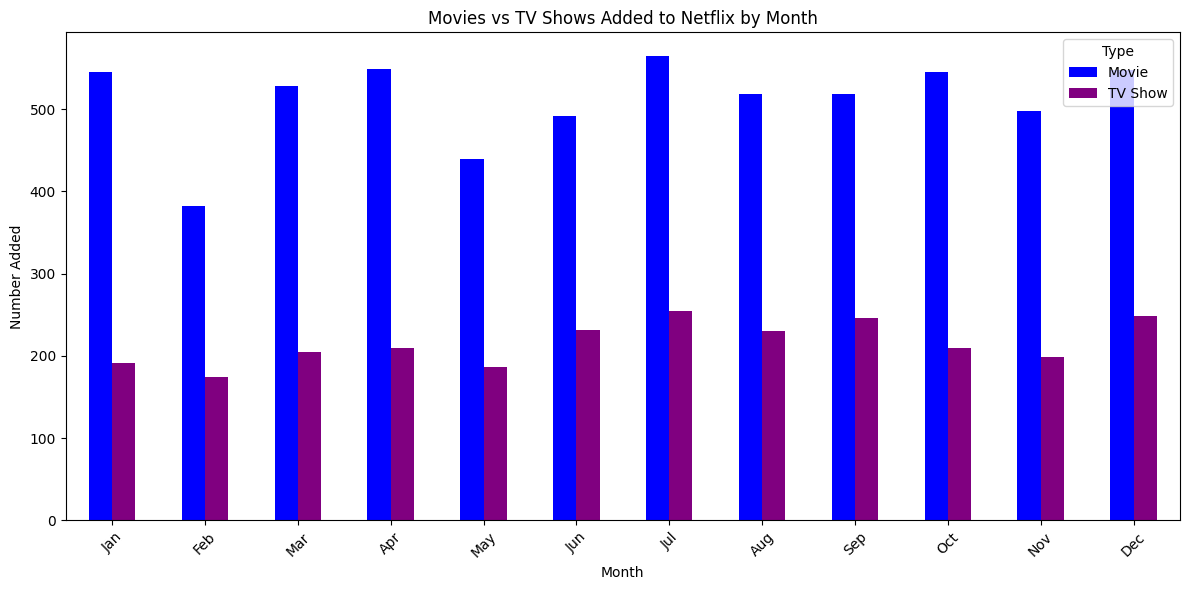

In [92]:
monthly_counts.plot(kind='bar', figsize=(12,6), color=['blue', 'purple']) #Total number of Movies vs TV Shows added by month
plt.title('Movies vs TV Shows Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Number Added')
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


- Հուլիս, դեկտեմբեր և հունվար ամիսներն այն ամիսներն են, որոնց ընթացքում հարթակում բեռնվում են բազմաթիվ հաղորդումներ և ֆիլմեր։
Կարծում եմ դա կարող է պայմանավորված լինել նրանով, որ այս ամիսներին մարդիկ կարող են մնալ տանը և ազատ ժամանակ դիտել հաղորդումներ և ֆիլմեր։

In [94]:
year_month = (df.groupby(['year', 'month']).size().unstack(fill_value=0))
year_month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2008,1,1,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,1,0,0,0,0,0,1,0
2010,0,0,0,0,0,0,0,0,0,0,1,0
2011,0,0,0,0,1,0,0,0,1,11,0,0
2012,0,1,0,0,0,0,0,0,0,0,1,1
2013,0,0,1,0,0,0,0,1,2,2,2,2
2014,2,2,0,2,0,1,1,1,1,4,4,5
2015,1,3,4,5,5,5,7,2,6,14,3,18
2016,41,15,16,21,11,18,28,33,45,51,42,94


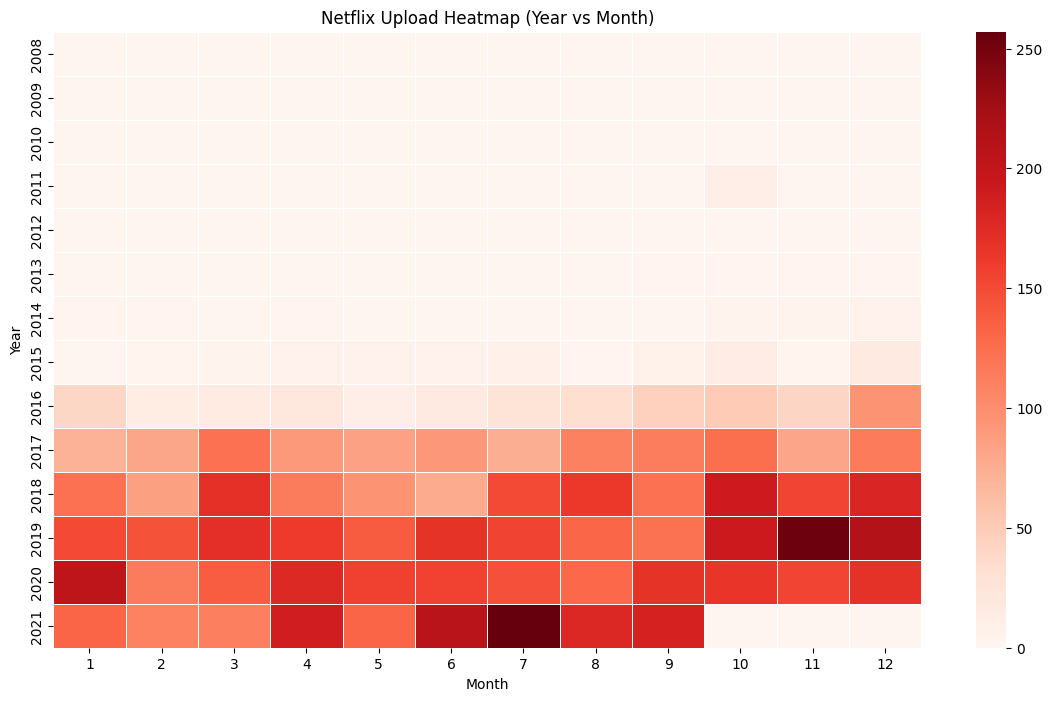

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(year_month, cmap='Reds',  linewidths=0.5)
plt.title('Netflix Upload Heatmap (Year vs Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


- Մինչև 2015 թ. ֆիլմերի ավելացումը շատ ցածր է և համեմատաբար կայուն։
- 2016-ից հետո նկատվում է կտրուկ աճ, իսկ 2018–2020 թթ. ընկած ժամանակահատվածում ավելացումների քանակը հասնում է իր գագաթնակետին:
- 2020–2021 թթ. տվյալները ցույց են տալիս բարձր ակտիվություն տարվա առաջին կեսում, սակայն վերջին ամիսների տվյալները կարող են լինել թերի։




> Title



In [95]:
df['title'].duplicated().sum()

np.int64(3)

In [97]:
df[df['title'].duplicated(keep=False)].sort_values('title')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day
3962,s3963,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,2019,TV-14,124 min,"[Comedies, Dramas, Independent Movies]","On India's Independence Day, a zany mishap in ...",2019,3,29
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,2019,TV-14,124 min,"[Comedies, Dramas, Independent Movies]","On India's Independence Day, a zany mishap in ...",2019,3,29
4522,s4523,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,2018,R,144 min,"[Dramas, Thrillers]","After devastating terror attacks in Norway, a ...",2018,10,10
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,2018,R,144 min,"[Dramas, Thrillers]","After devastating terror attacks in Norway, a ...",2018,10,10
3996,s3997,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,2019-03-20,2018,TV-14,1 Season,"[International TV Shows, TV Dramas]","As a psychology professor faces Alzheimer's, h...",2019,3,20
5964,s5965,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,2019-03-20,2018,TV-14,1 Season,"[International TV Shows, TV Dramas]","As a psychology professor faces Alzheimer's, h...",2019,3,20


- Հետևյալ դեպքում դուպլիկատը լրիվ հանդիսանում է կրկնաօրինակ, հետևաբար կարող ենք հեռացնել

In [98]:
df = df.drop_duplicates(subset=['title', 'type', 'release_year'],keep='first')
df['title'].duplicated().sum()

np.int64(0)



> Duration



- Ընդհանուր տևողությունը րոպեներով կամ սեզոնների քանակով
- Քանի որ ֆիլմերը չափվում են ժամանակով, իսկ շոուները՝ սեզոններով, մենք պետք է տվյալների բազմությունը բաժանենք ֆիլմերի և շոուների միջև։

Text(38.347222222222214, 0.5, 'Number of Movies')

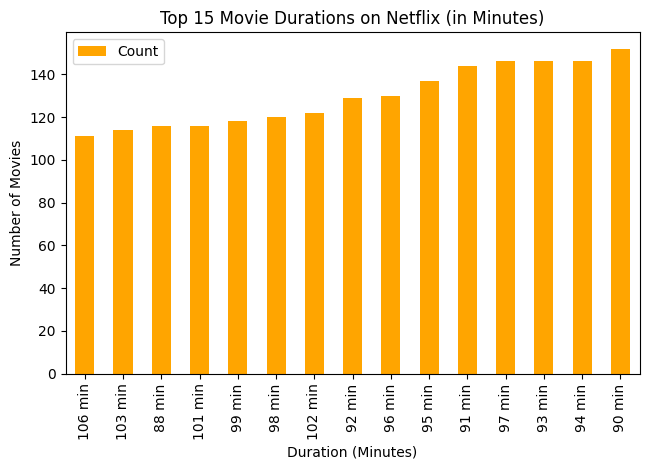

In [102]:
movies_duration =df[df["type"]=="Movie"].groupby("duration").size().reset_index(name='Count').sort_values(by="Count")
movies_duration.tail(15).plot(kind="bar", x="duration", y="Count", color = 'orange') #Վերցնում է ամենաշատ հանդիպող 15 duration-ները
plt.title("Top 15 Movie Durations on Netflix (in Minutes)")
plt.xlabel("Duration (Minutes)")
plt.tight_layout()
plt.ylabel("Number of Movies")

- Ֆիլմերի մեծ մասը տևում է 90-ից 106 րոպե

In [103]:
tv = df[df["type"] == "TV Show"].copy()
tv["seasons"] = tv["duration"].str.extract(r"(\d+)").astype(int)
season_counts = (tv.groupby("seasons").size().reset_index(name="Count").sort_values(by="Count"))
season_counts

,seasons,Count
14,17,1
10,11,2
11,12,2
13,15,2
12,13,3
9,10,7
8,9,9
7,8,17
6,7,23
5,6,33


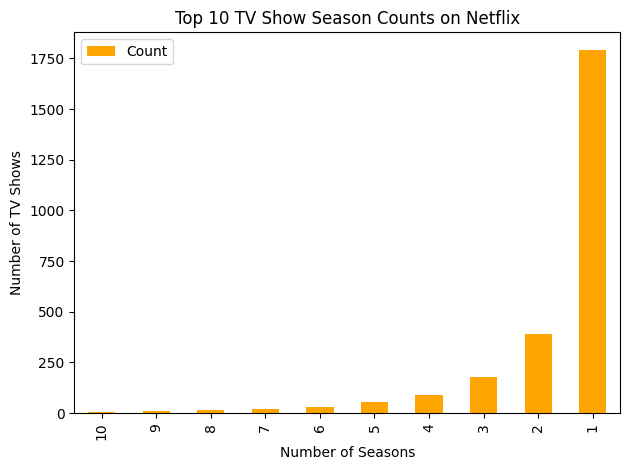

In [ ]:
season_counts.tail(10).plot(kind="bar",x="seasons",y="Count", color='orange')

plt.title("Top 10 TV Show Season Counts on Netflix")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.tight_layout()
plt.show()

- Շոուների մեծ մասը տևում է 1 կամ 2 սեզոն, հազվադեպ է պատահում, որ շոուն ունենա 5-ից ավելի սեզոն:



> Եզրակացություն

- Netflix-ում Movie-ների քանակը գերակշռում է, սակայն TVShow-ների բաժինը տարիների ընթացքում աճել է, ինչը ցույց է տալիս, որ Netflix-ը աստիճանաբար ավելի մեծ ուշադրություն է դարձնում սերիալային բովանդակությանը։ Վերջին տարիներին TVShow-ների թողարկման աճը ավելի արագ է, քան Movie-ը։
- Միջինում Netflix-ը թողարկում է ավելի շատ Movie, քան TV Show մեկ ամսում, բայց TV Show-ների բաժինը կայուն աճում է։ Այսինքն Netflix-ը պահպանում է բարձր թողարկման տեմպ՝ շարունակաբար թարմացնելով իր բովանդակության գրադարանը։
- ԱՄՆ և Հնդկաստանը հարթակում ամբողջ բովանդակության արտադրող լավագույն 5 երկրներից են։
- TV-MA-ն գլխավորում է rating-ը, ինչը ցույց է տալիս, որ Netflix-ում մեծահասակների համար նախատեսված type-ը ավելի տարածված է։
- Շատ երկար ֆիլմերը հազվադեպ են, ինչը ցույց է տալիս, որ Netflix-ը նախընտրում է
դիտողին հարմար և զանգվածային լսարանի համար մատչելի բովանդակություն։
- Ընդհանուր առմամբ, Netflix-ը կենտրոնանում է բովանդակության հաճախակի թողարկման, դիտողին հարմար ձևաչափերի և համաշխարհային շուկայի վրա։